In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle  # Assuming the dicts are saved using pickle

In [5]:
HIST_DATASET_PATH = "/home/heitor/USP/IC/FAPESP/code_dataset/dataset/Regular_Histograms"
OUTPUT_PATH = "/home/heitor/USP/IC/FAPESP/code_dataset/Plants-ConvNets-ViT/Overview/mean_histograms"

/tmp/ipykernel_22598/1875834382.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(80, 10))  # Adjust size as needed


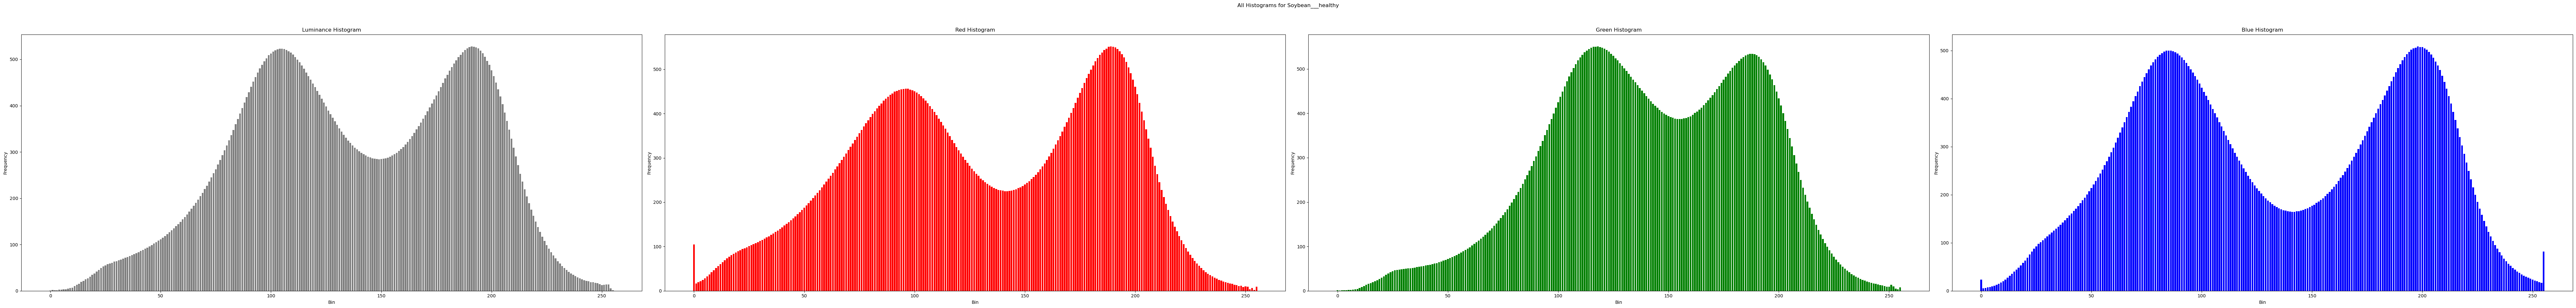

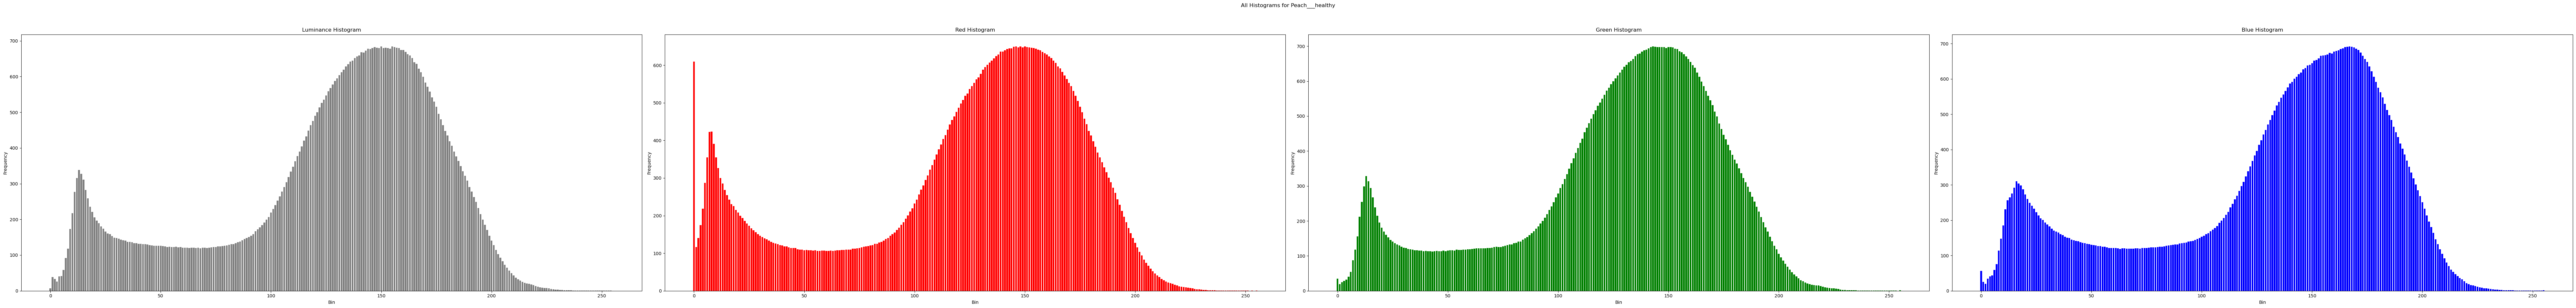

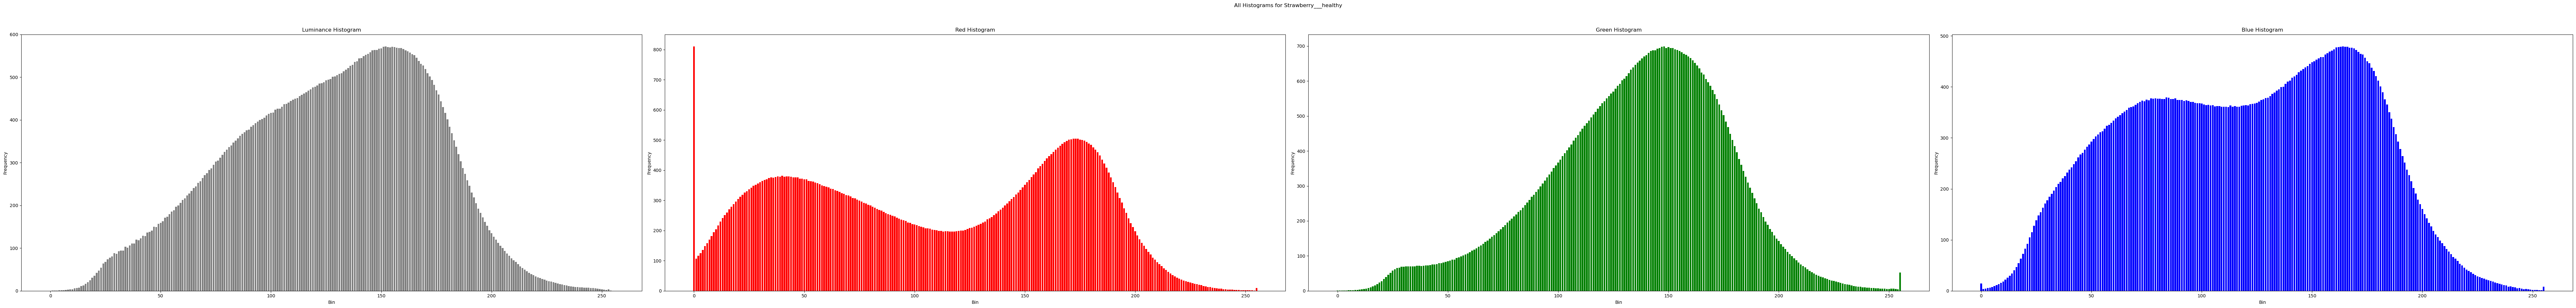

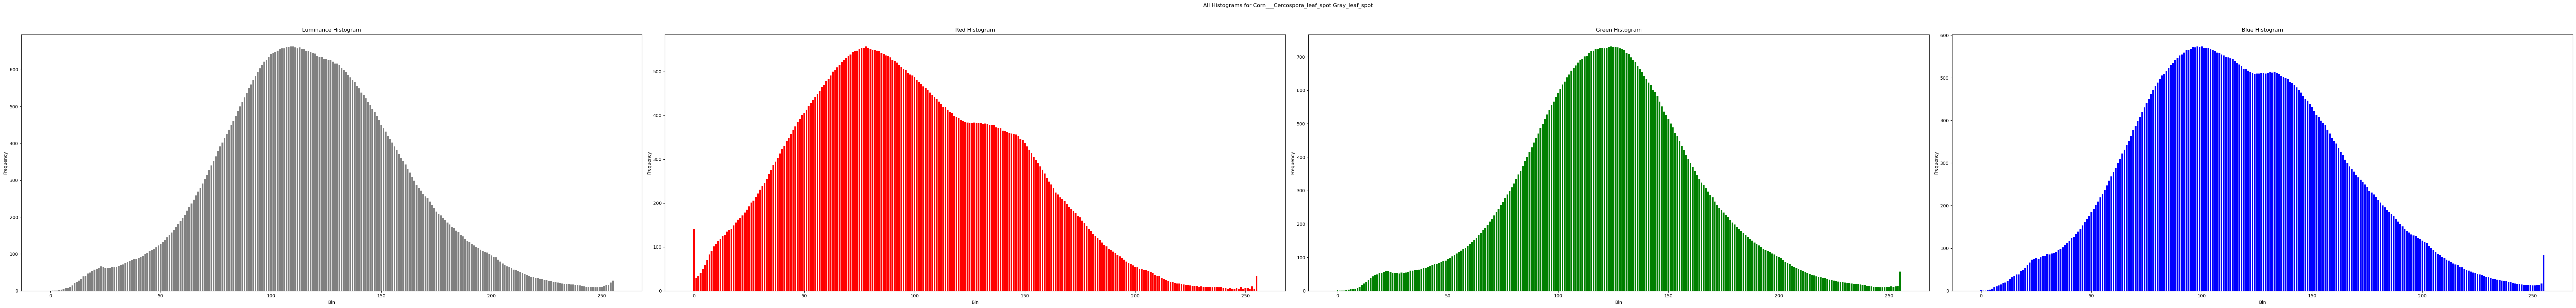

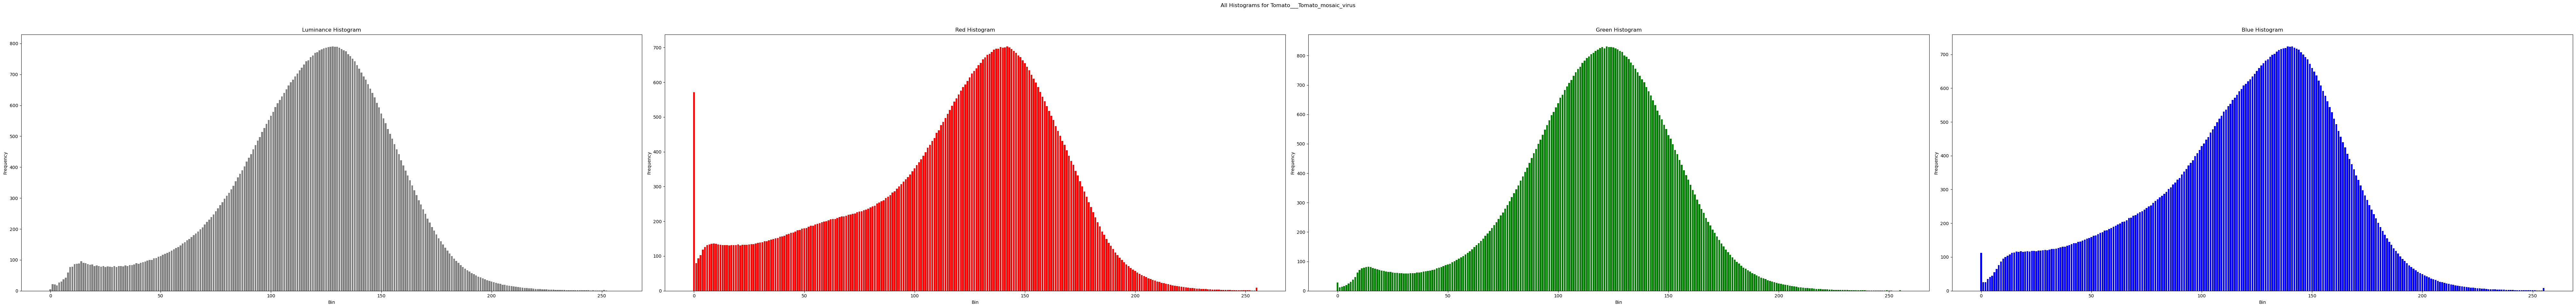

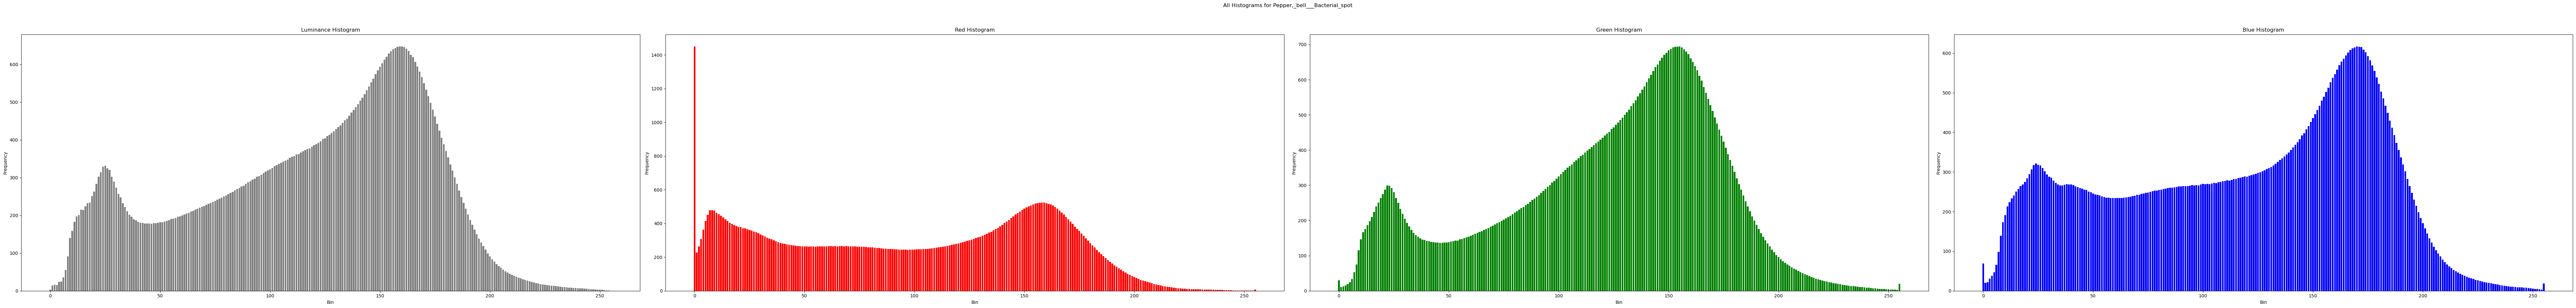

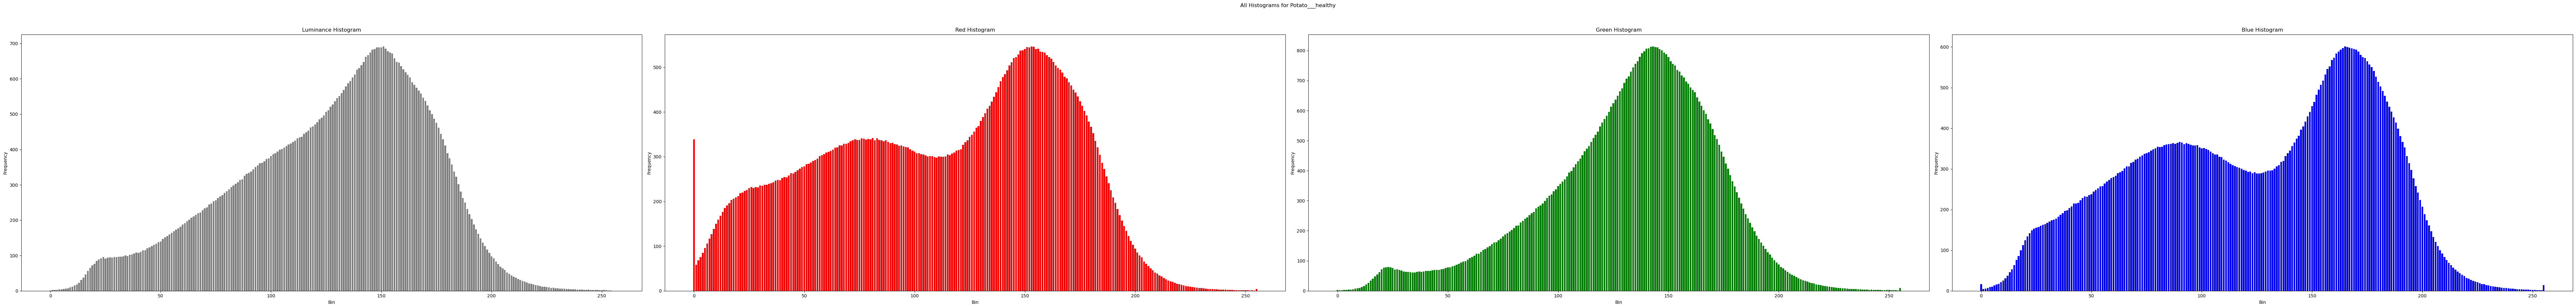

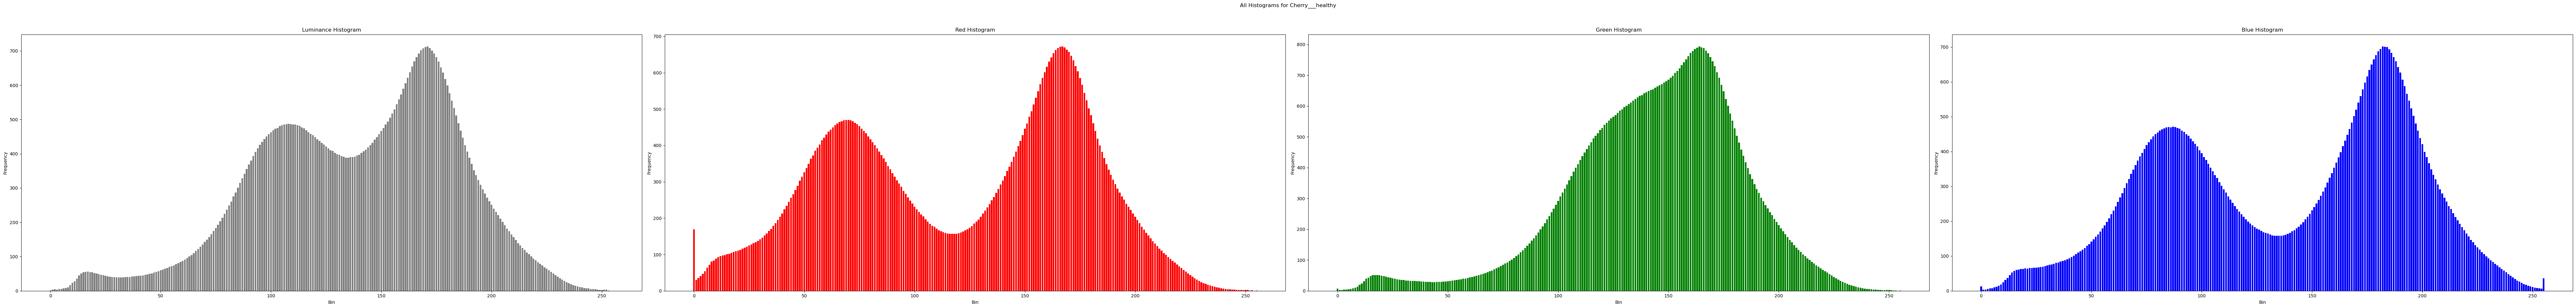

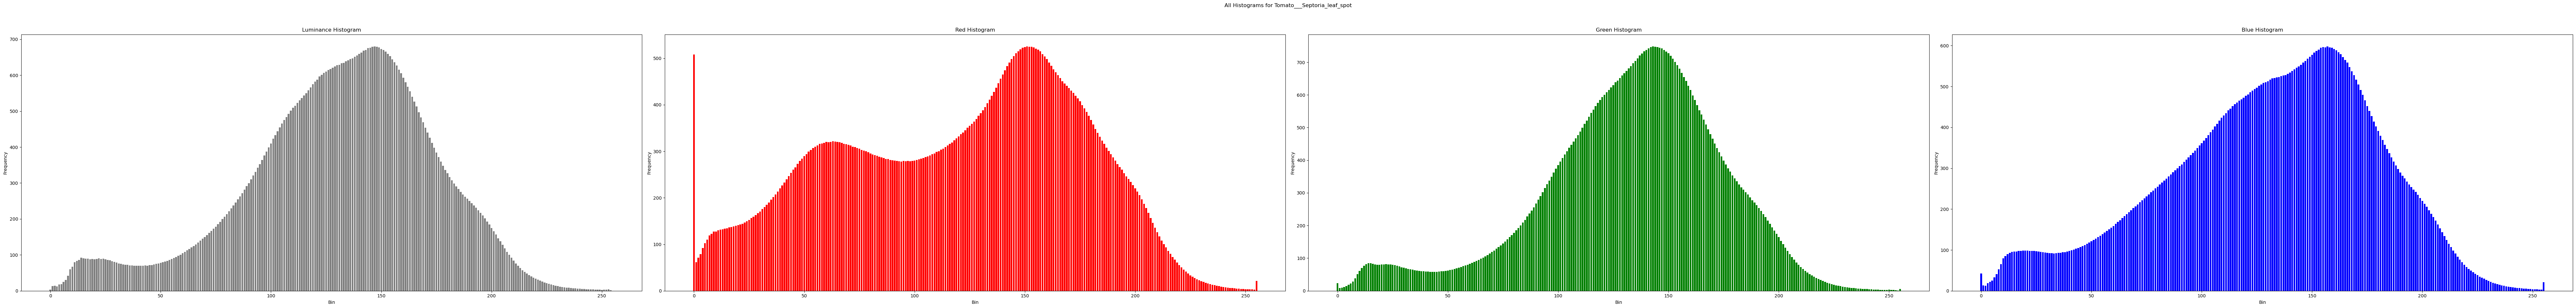

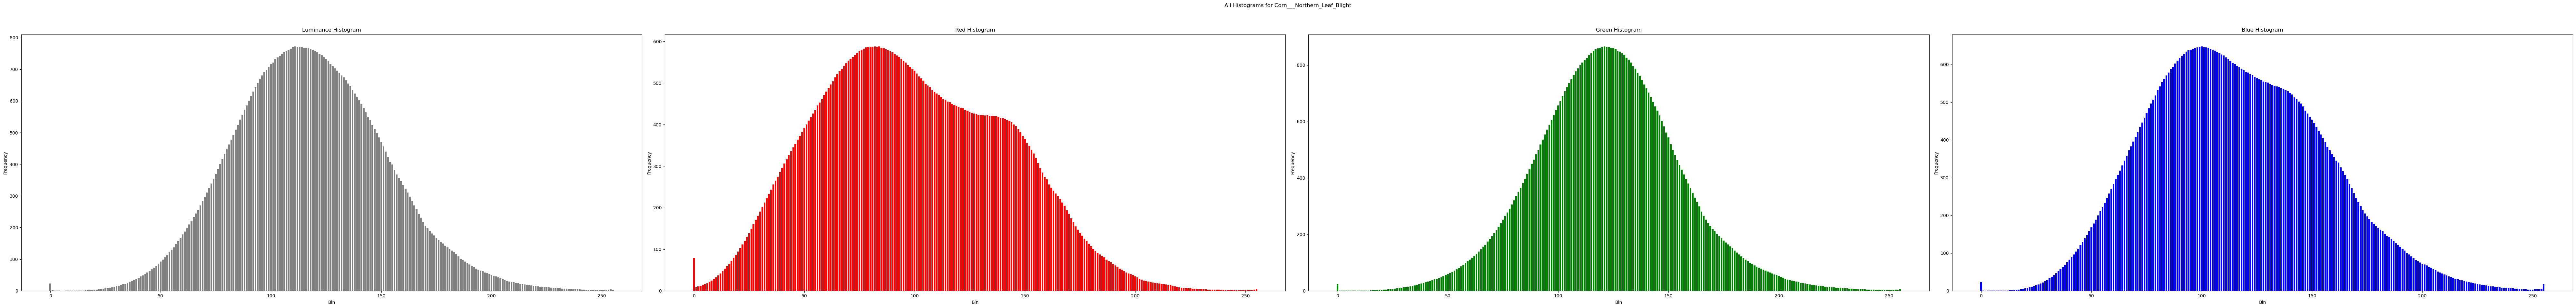

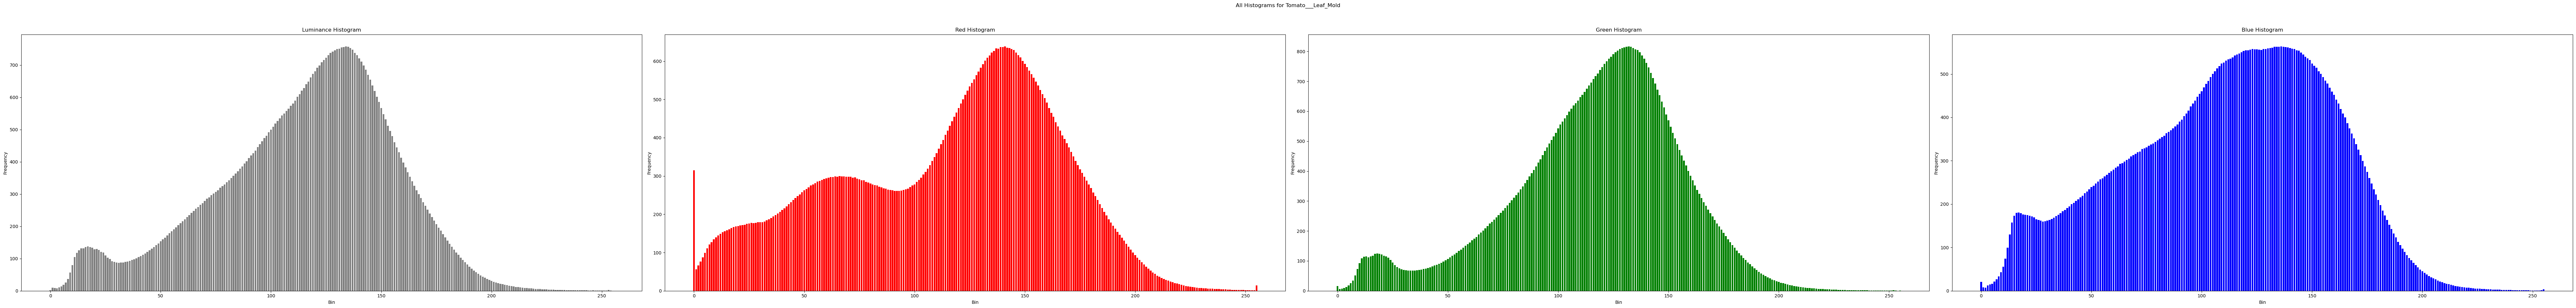

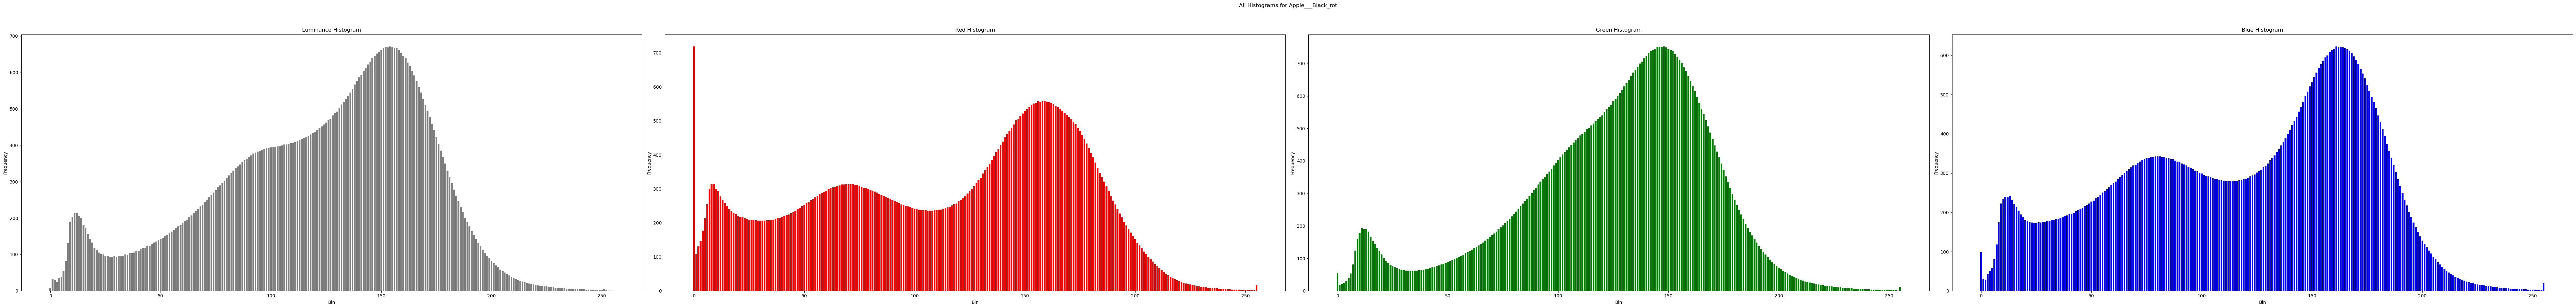

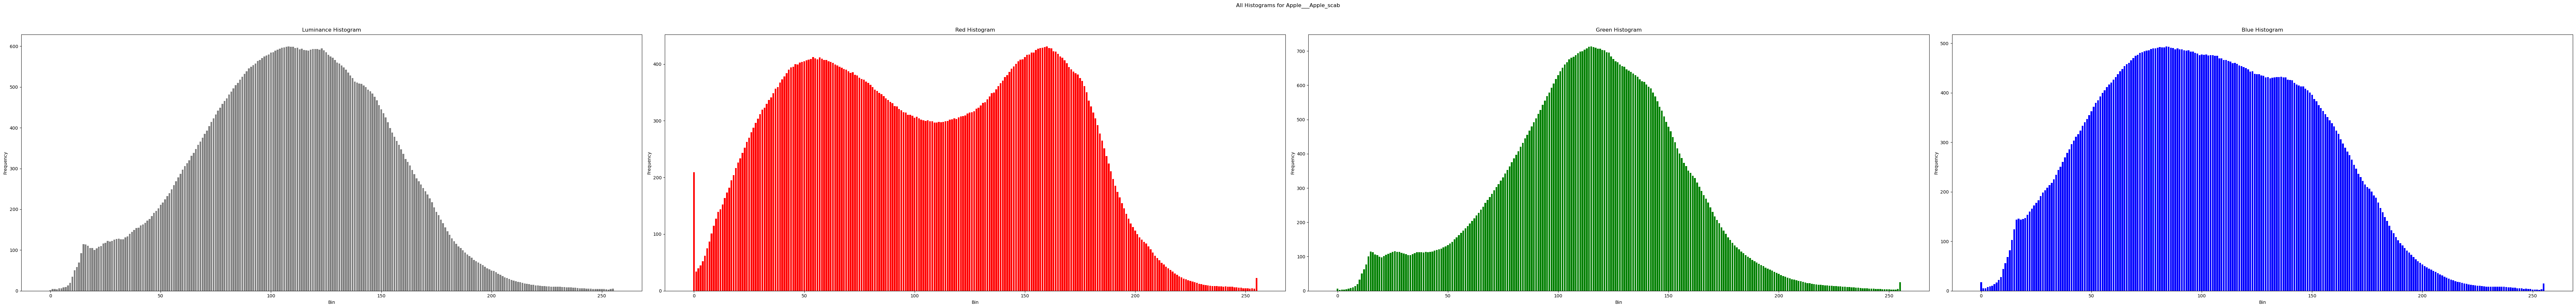

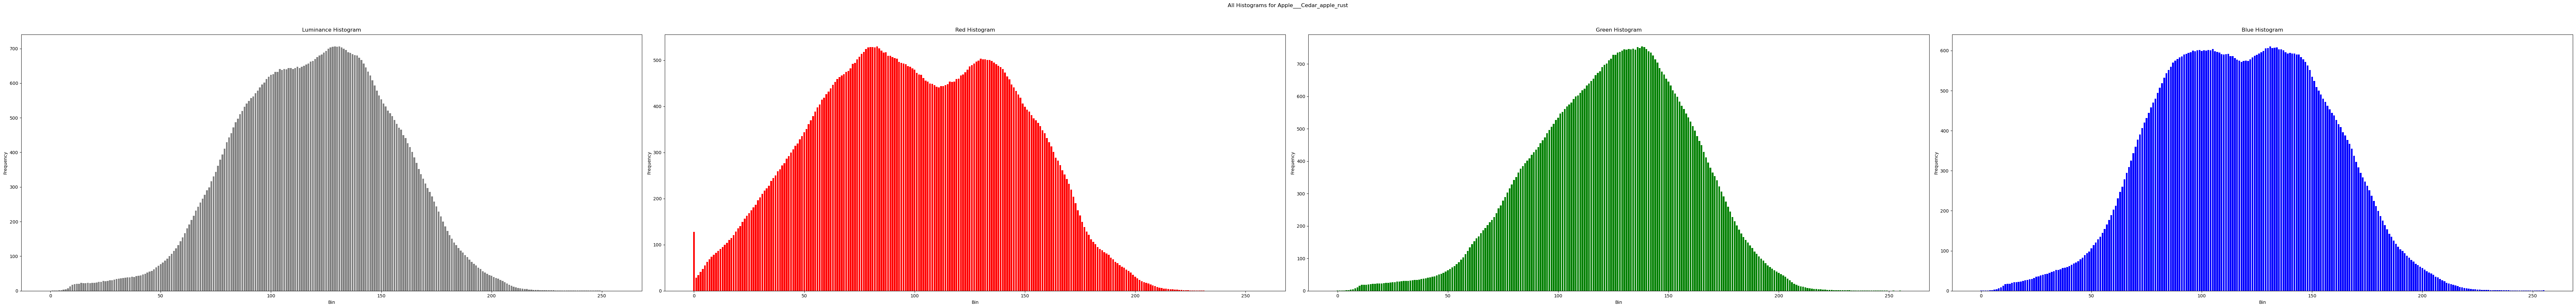

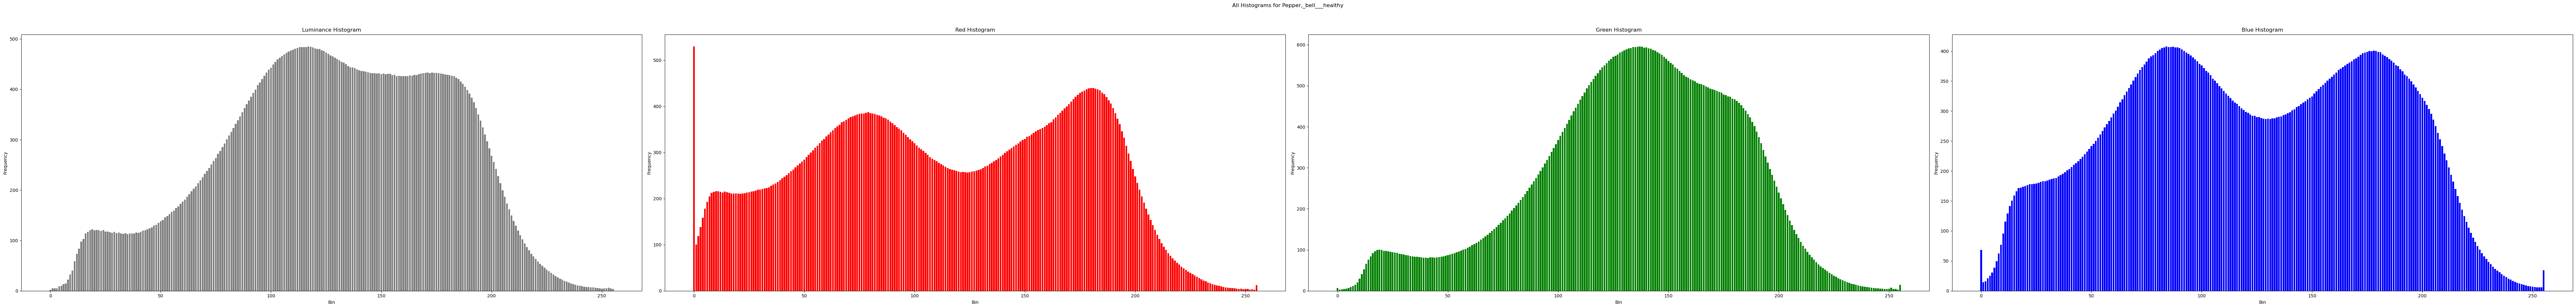

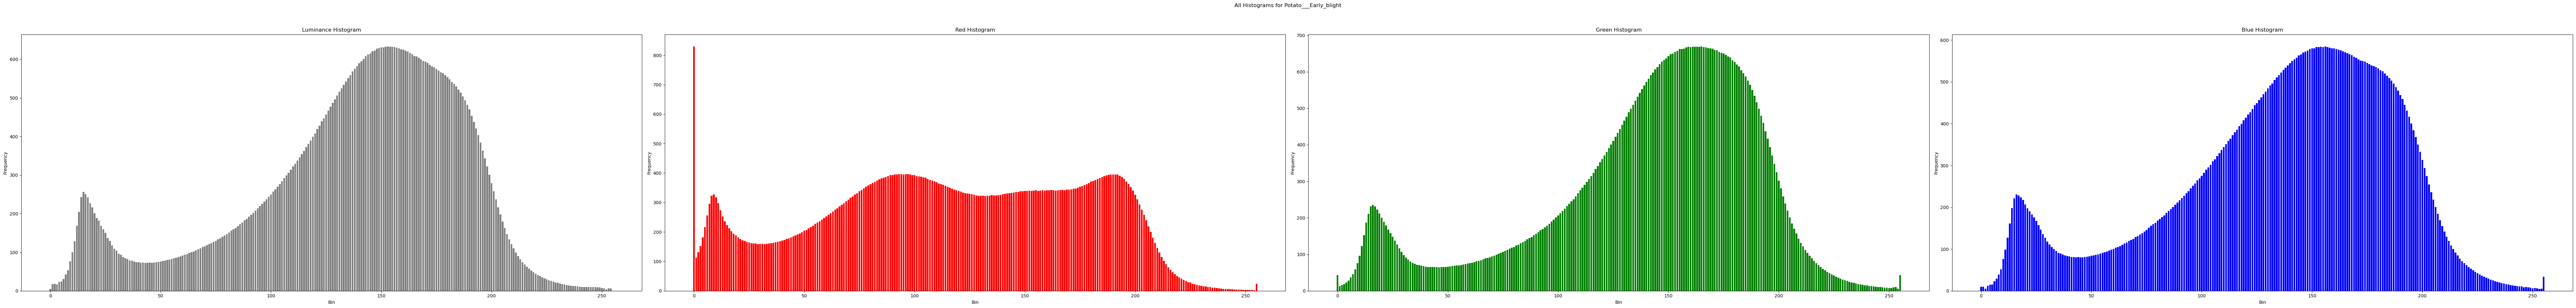

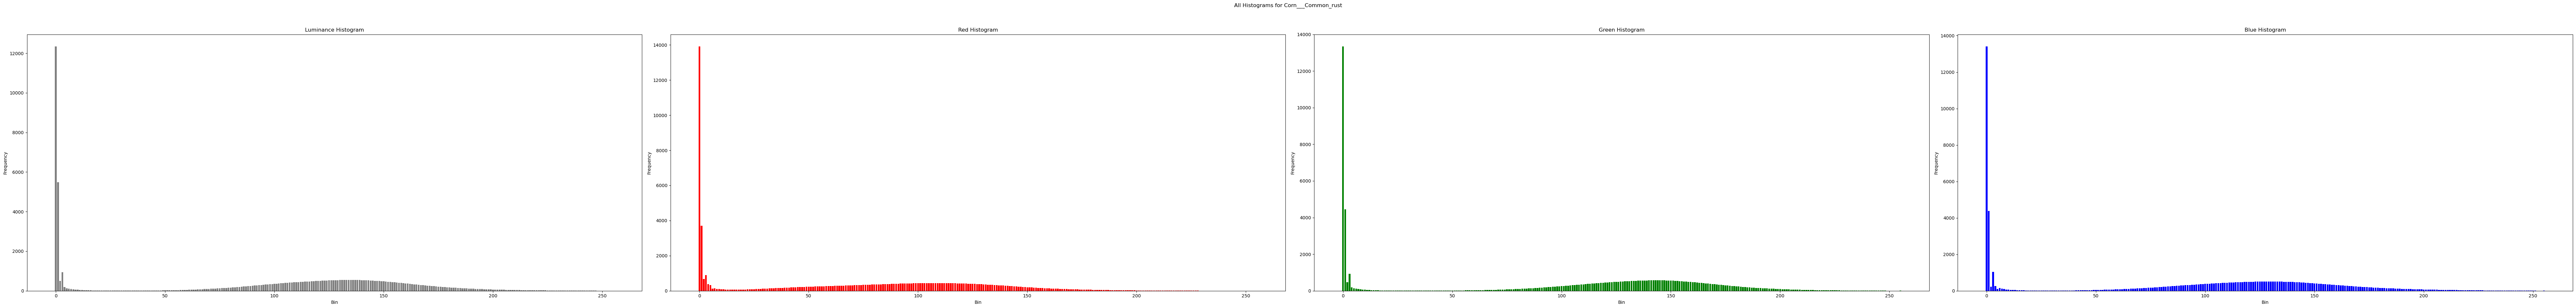

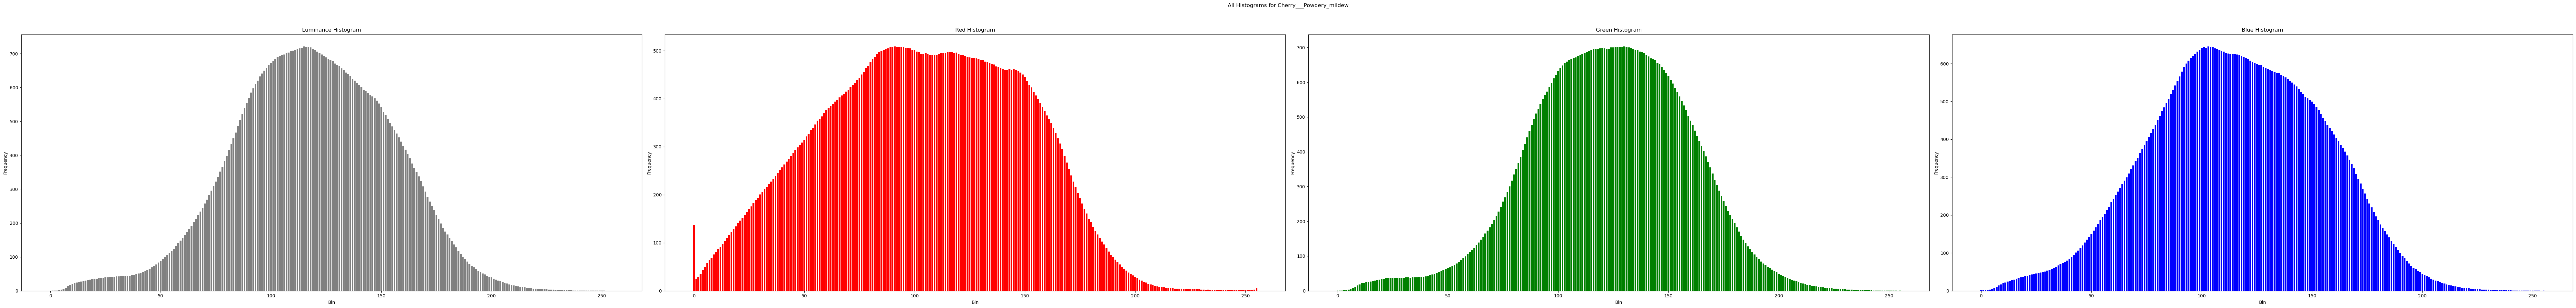

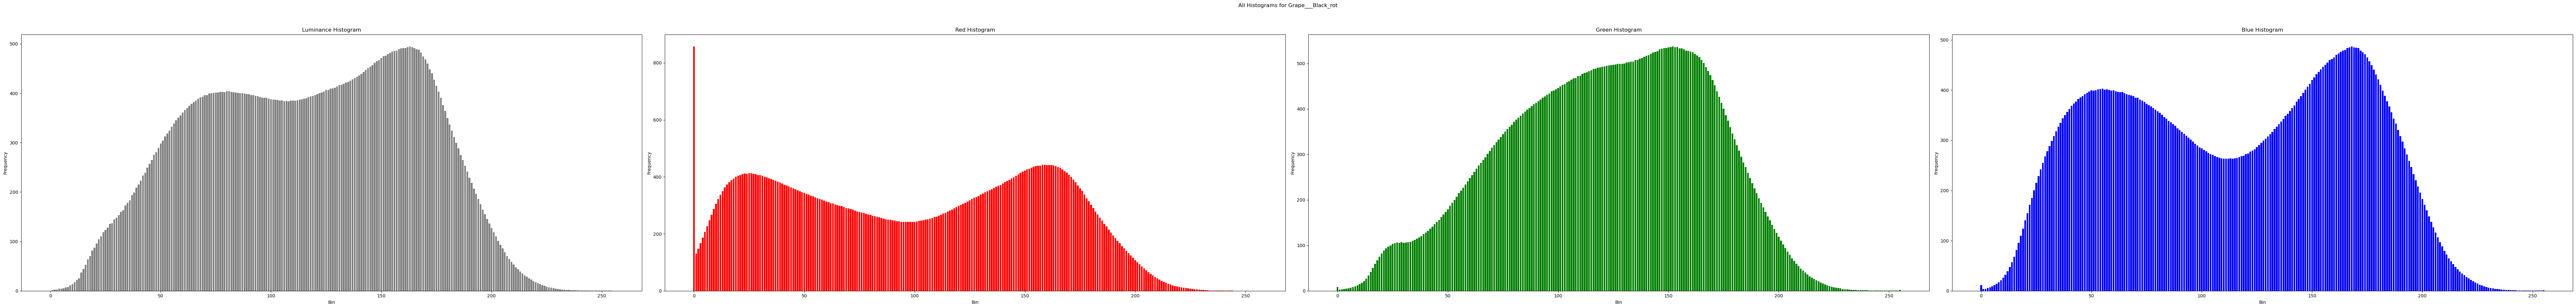

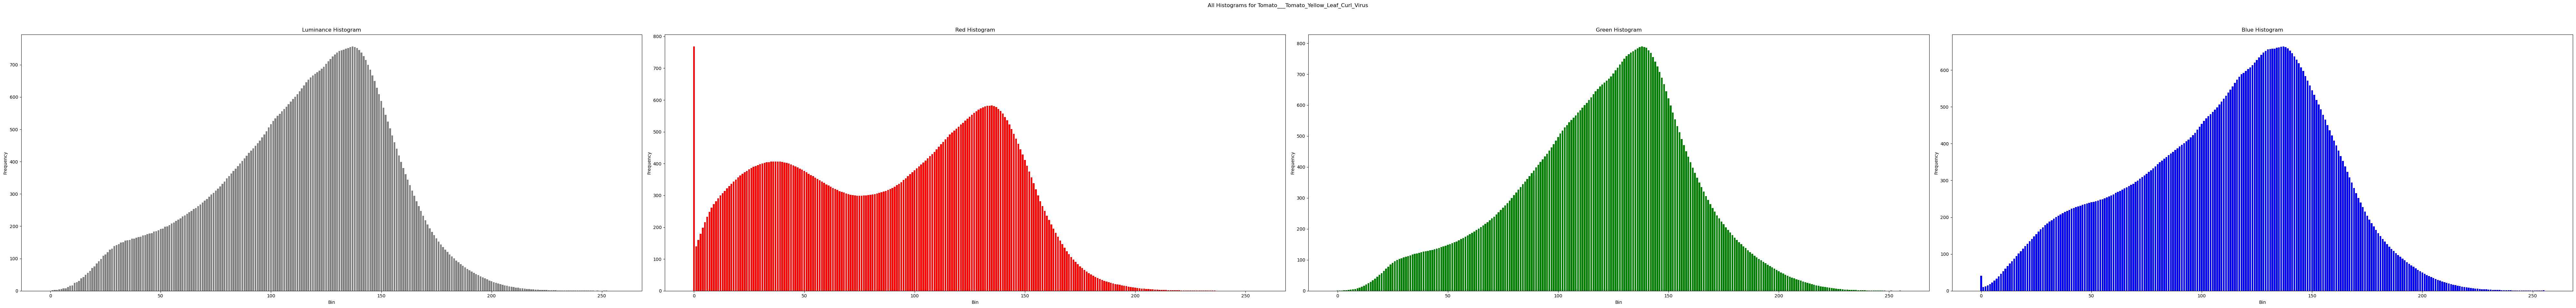

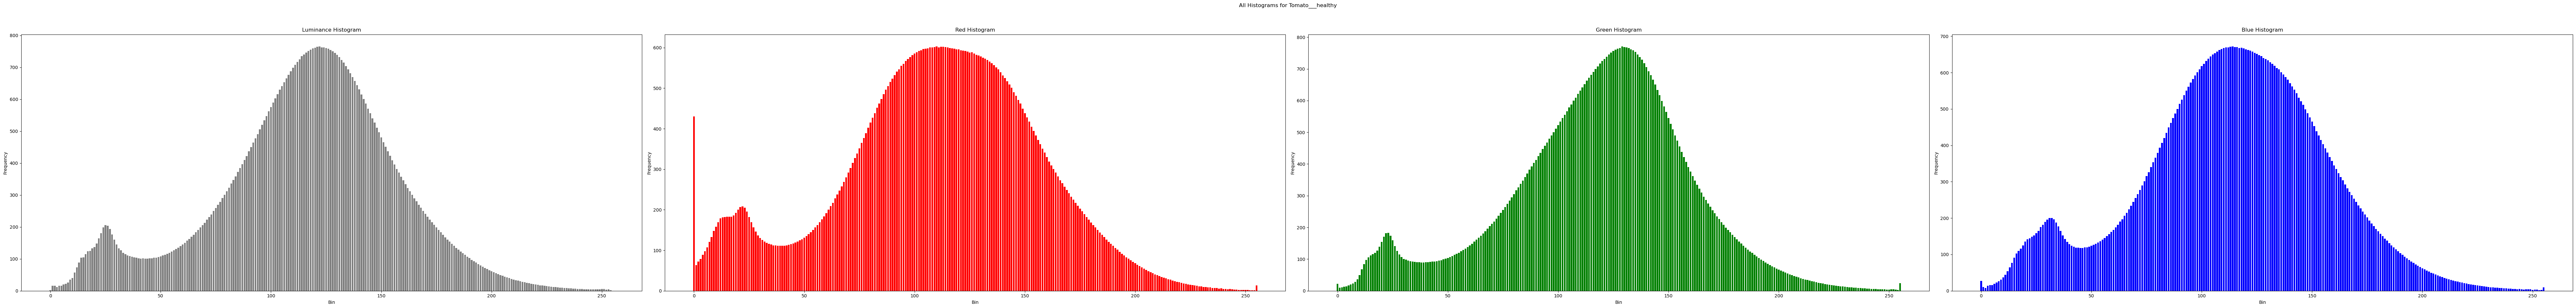

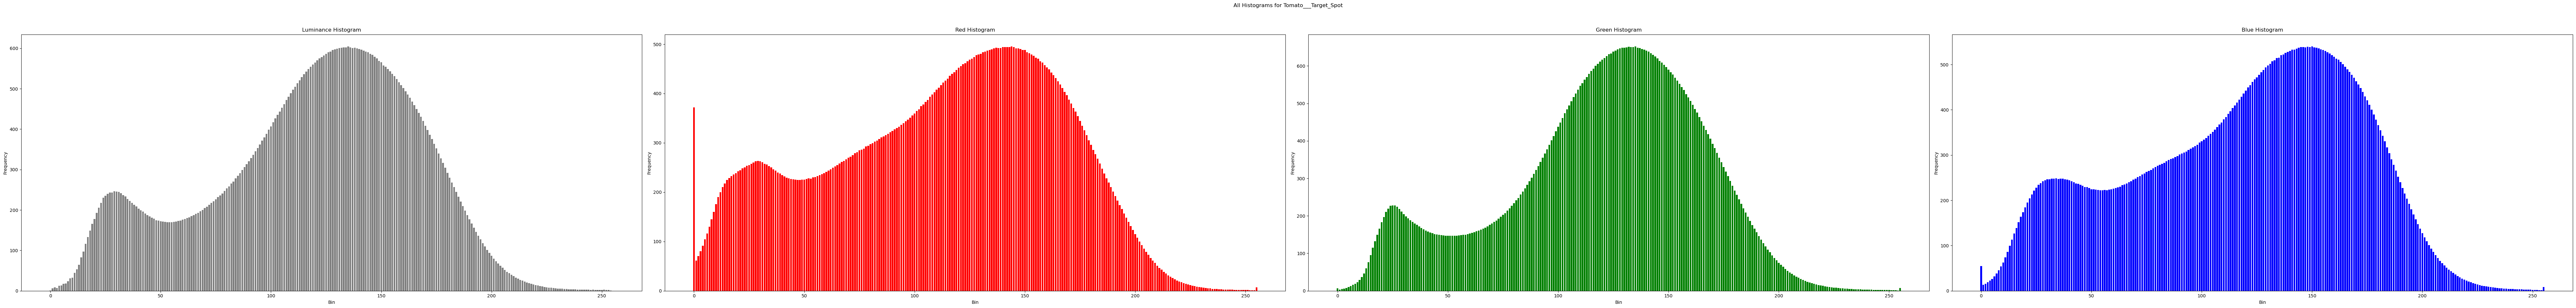

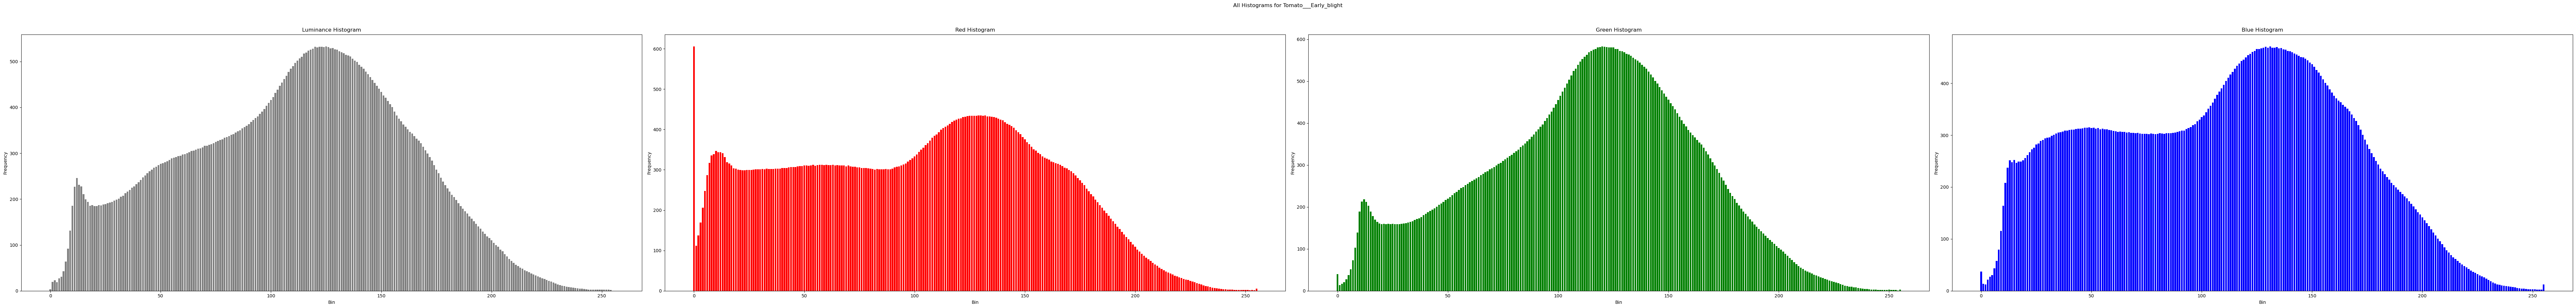

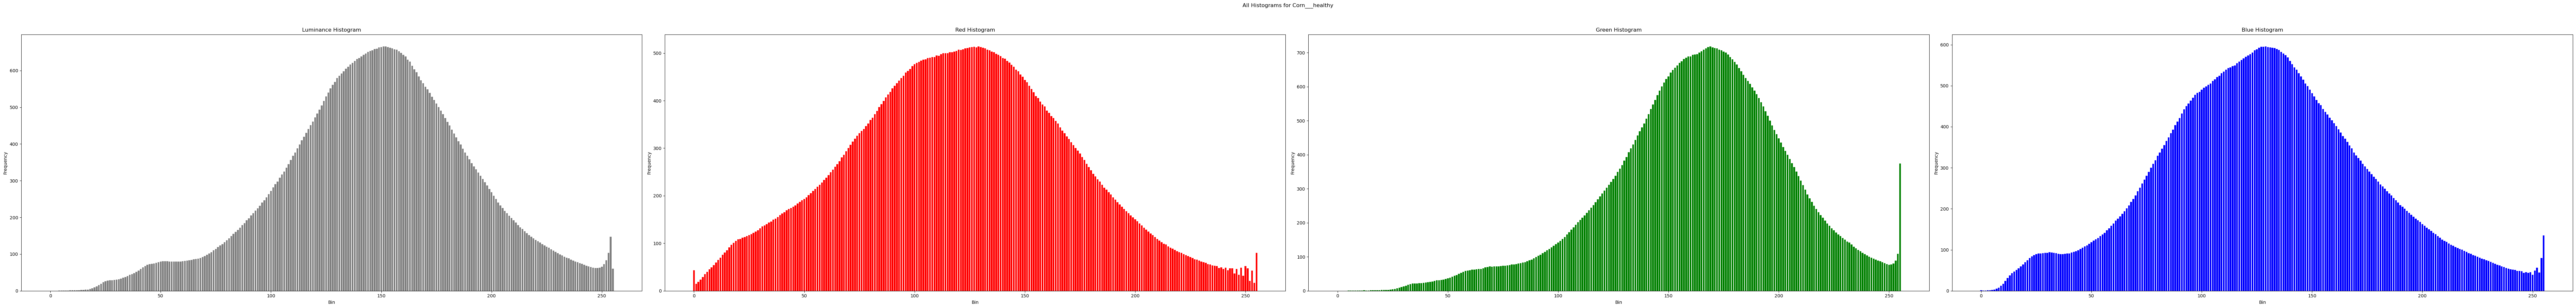

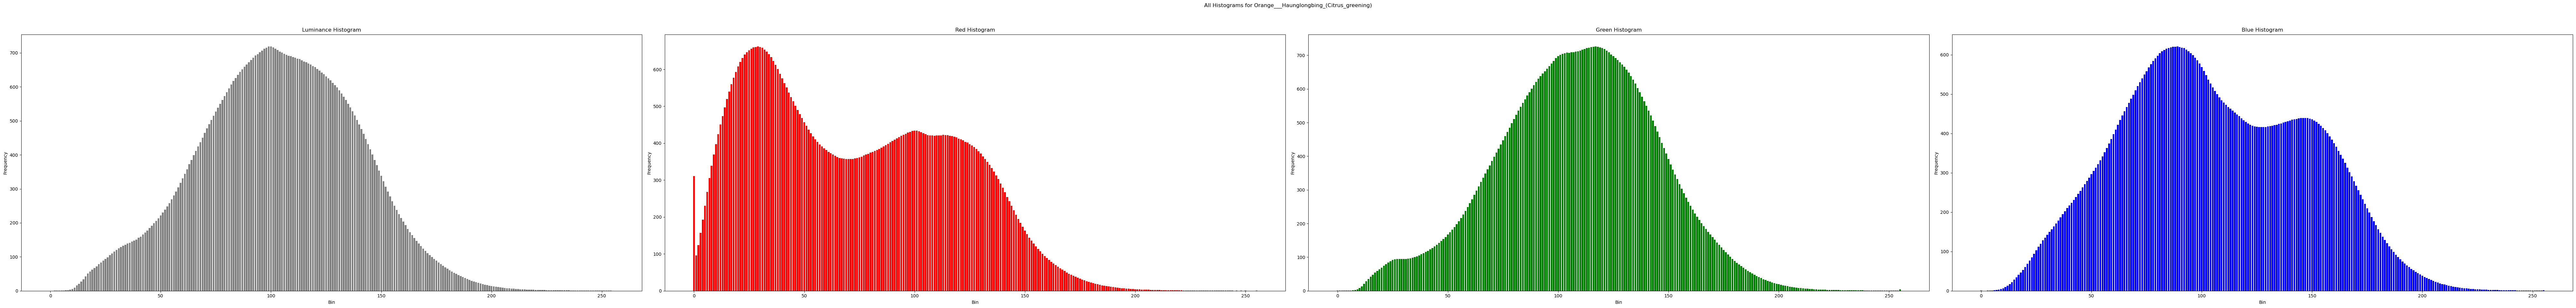

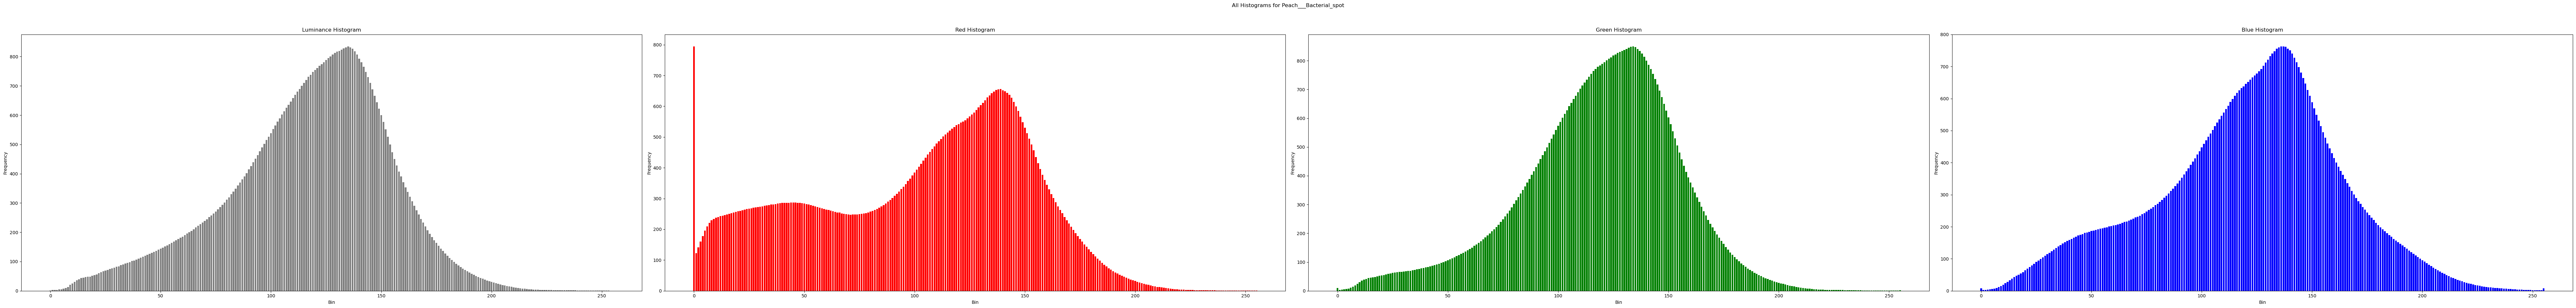

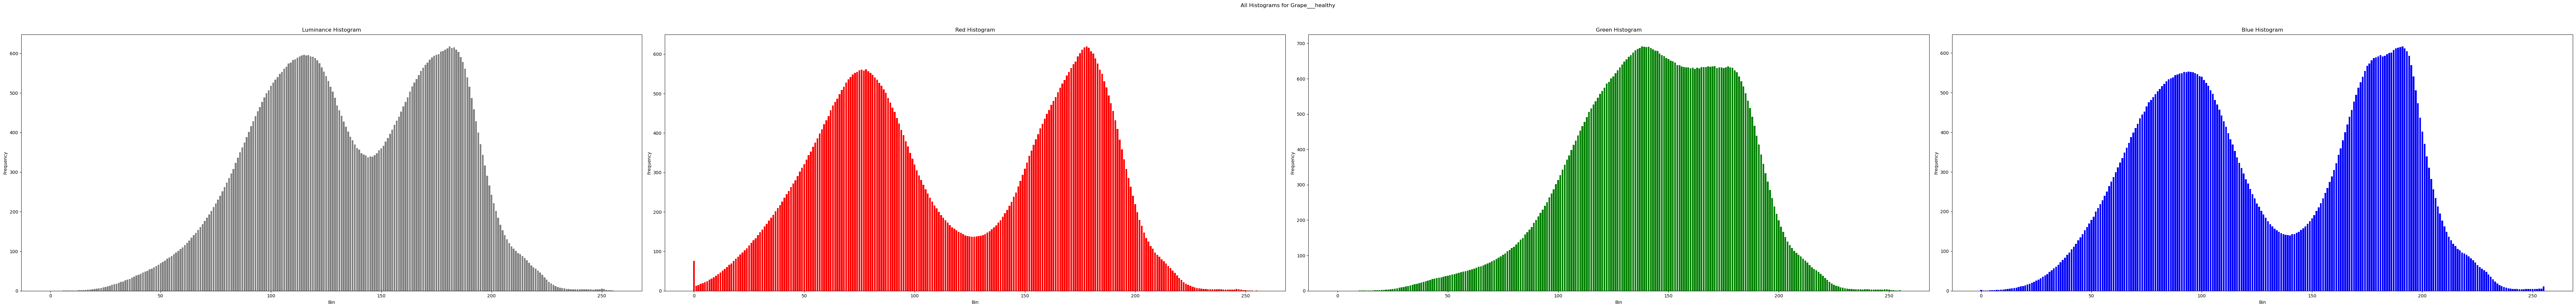

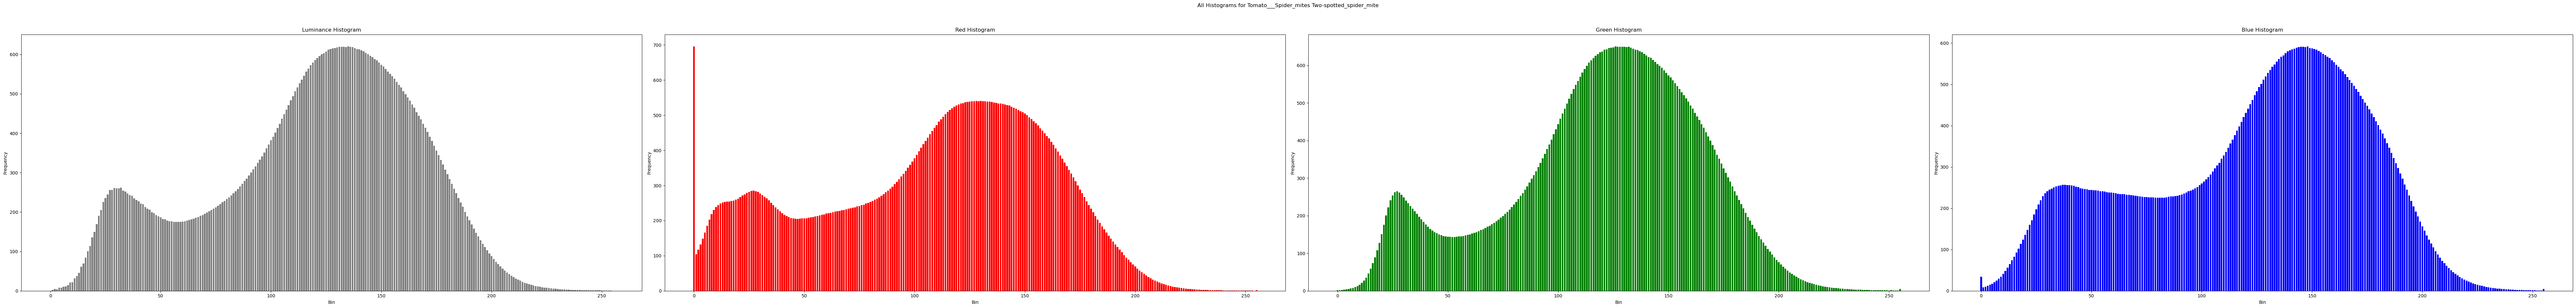

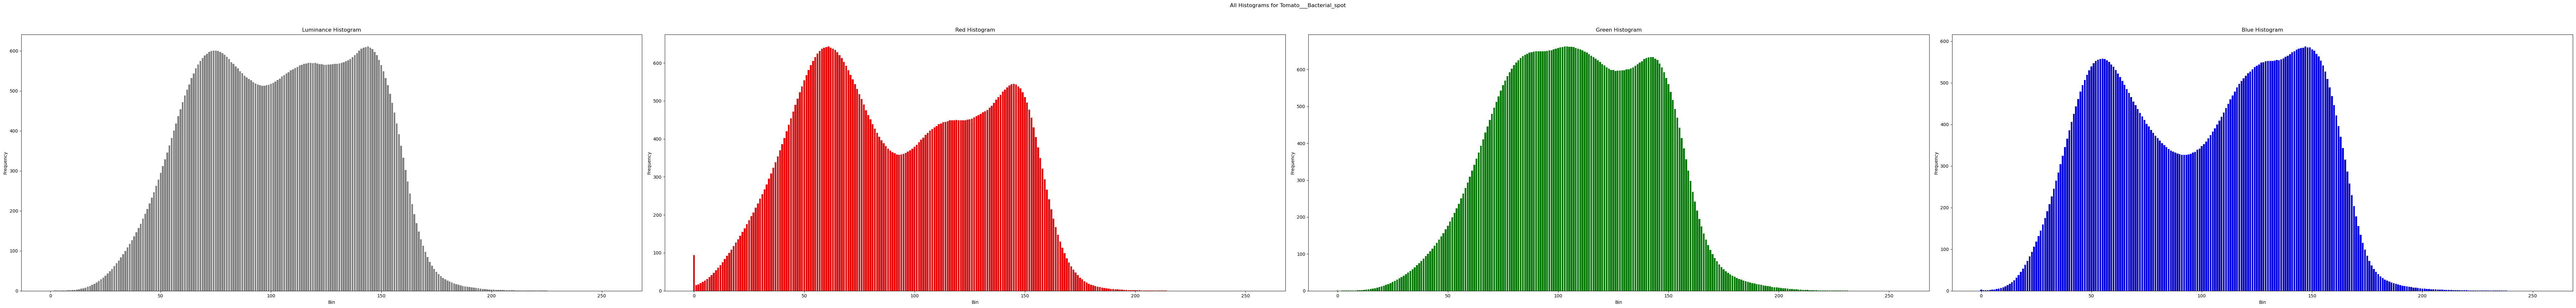

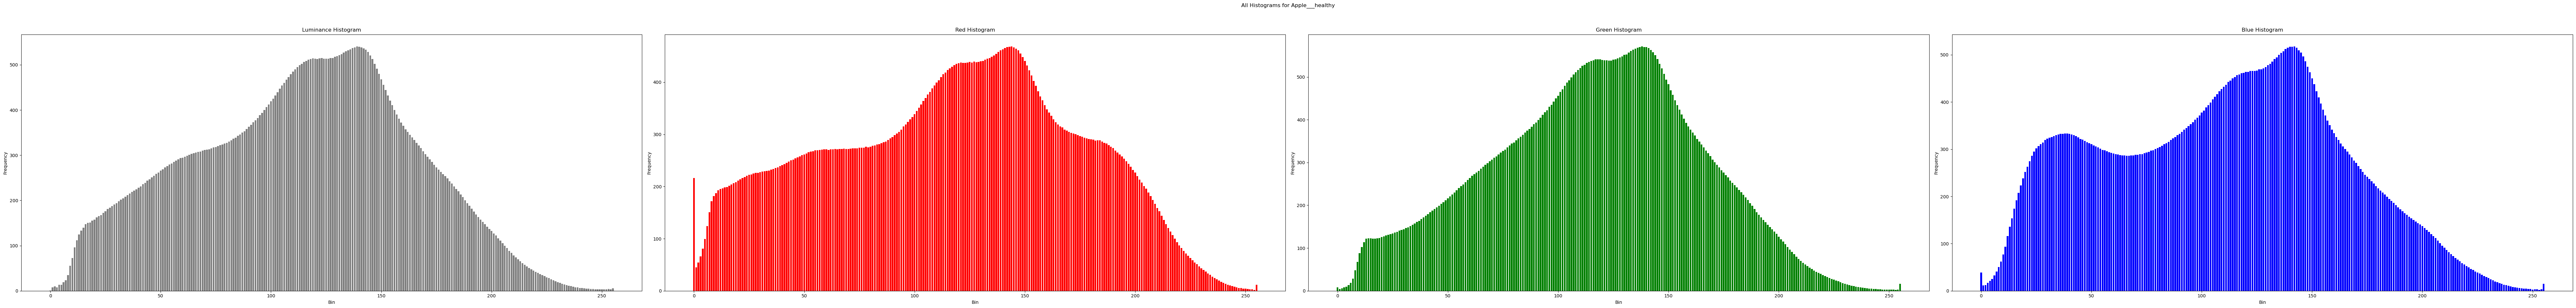

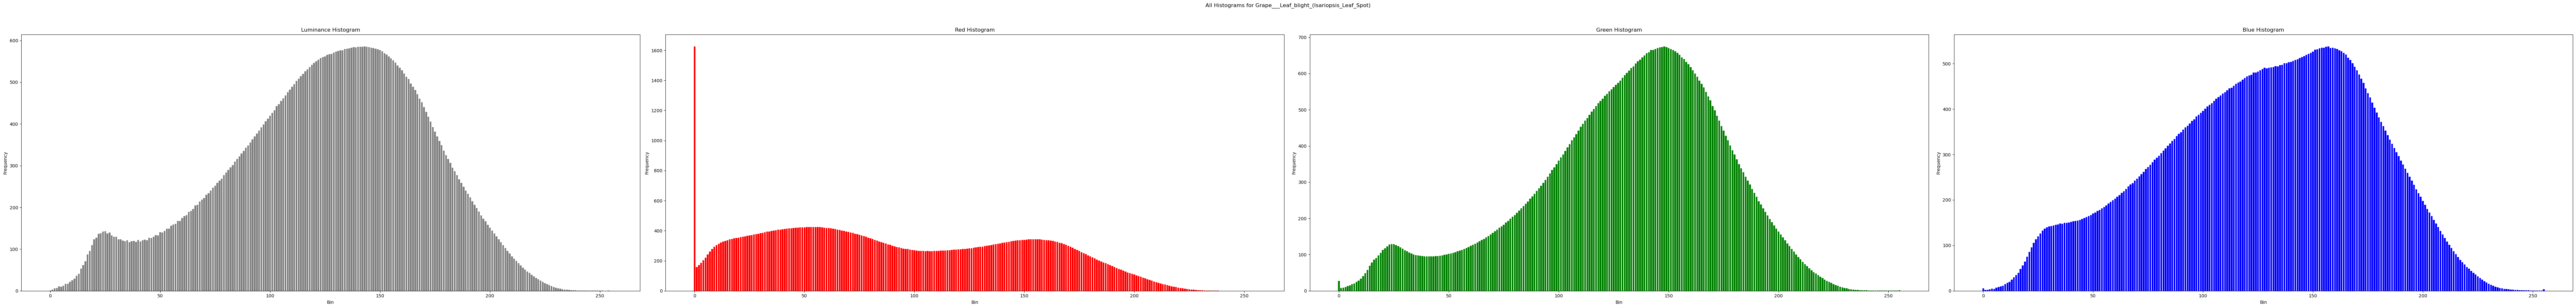

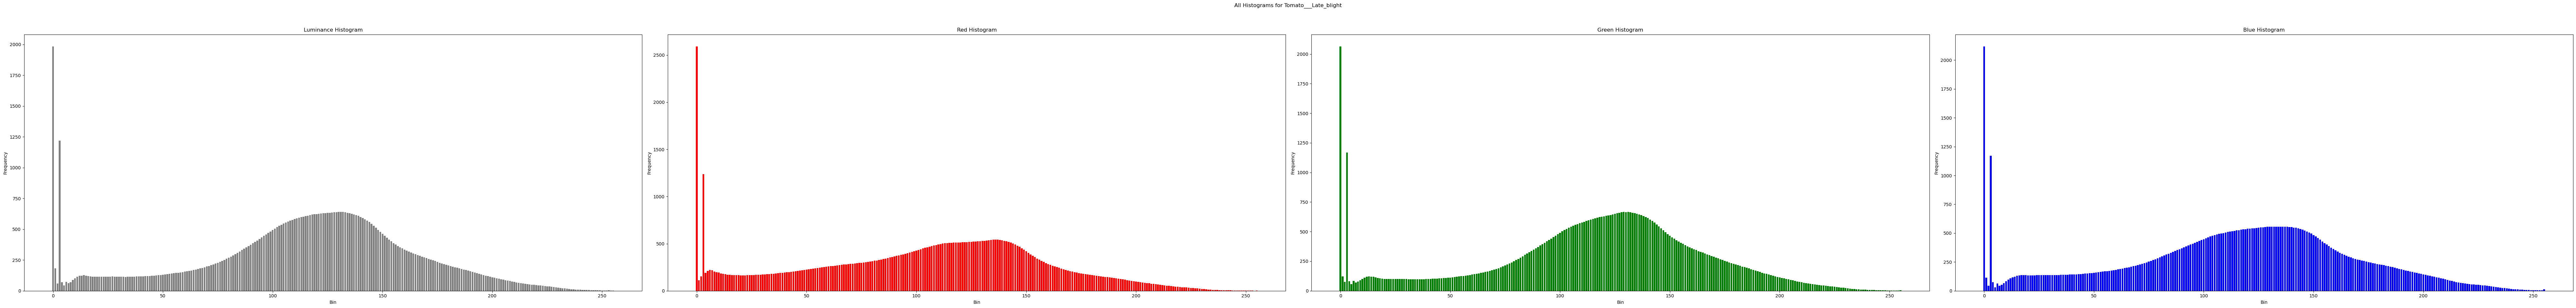

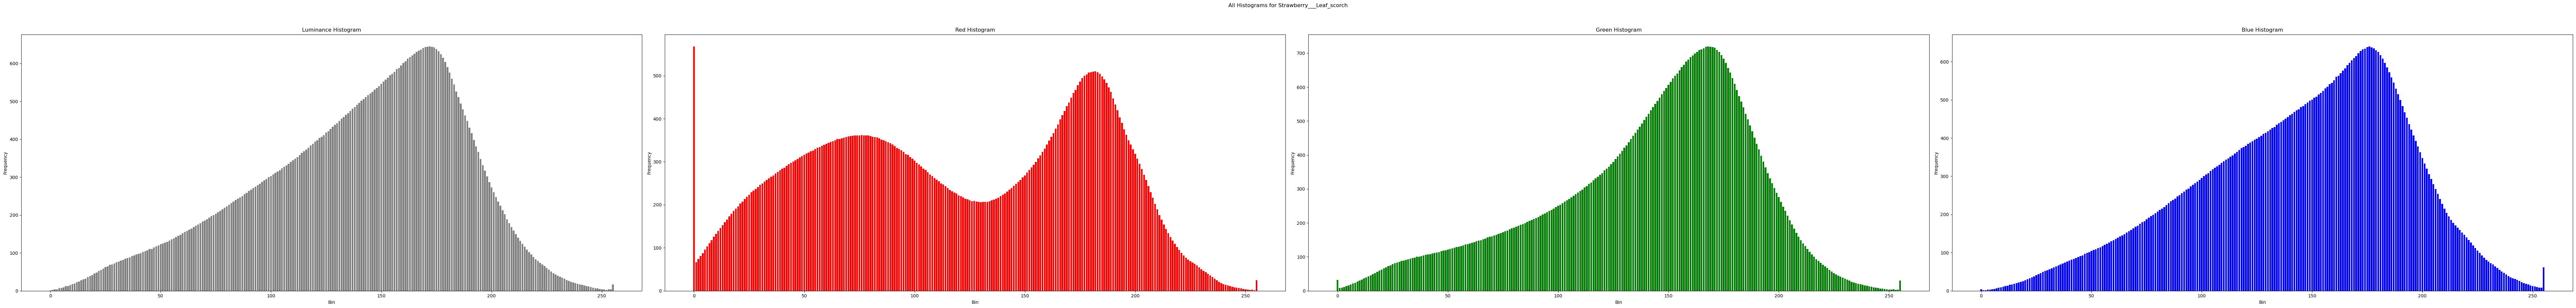

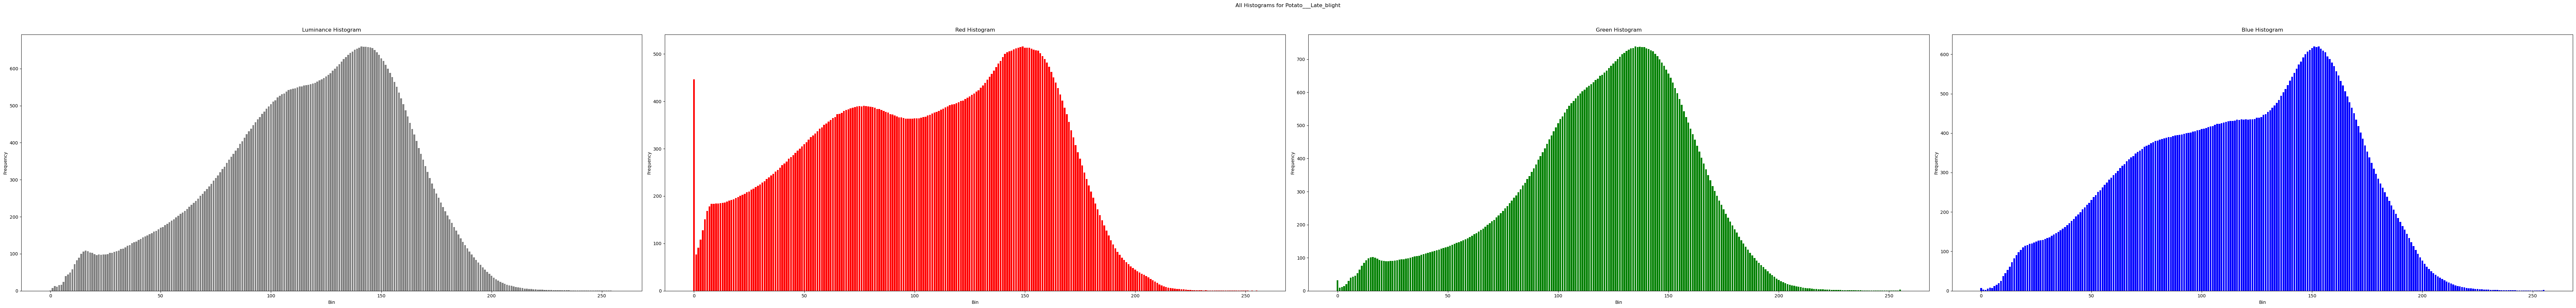

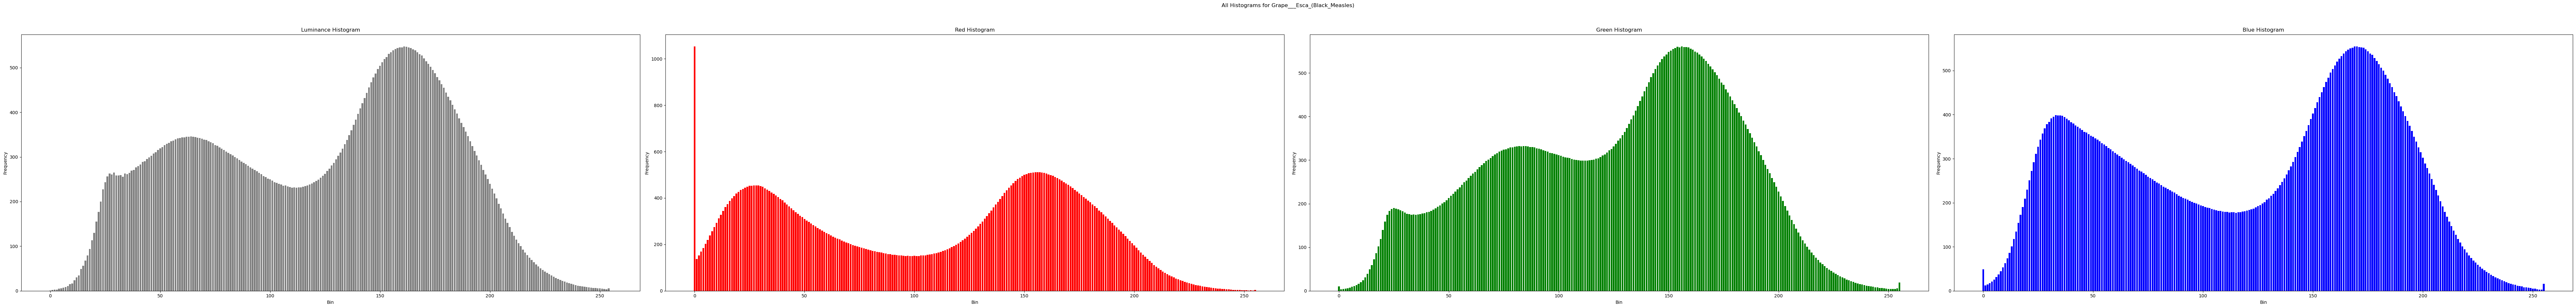

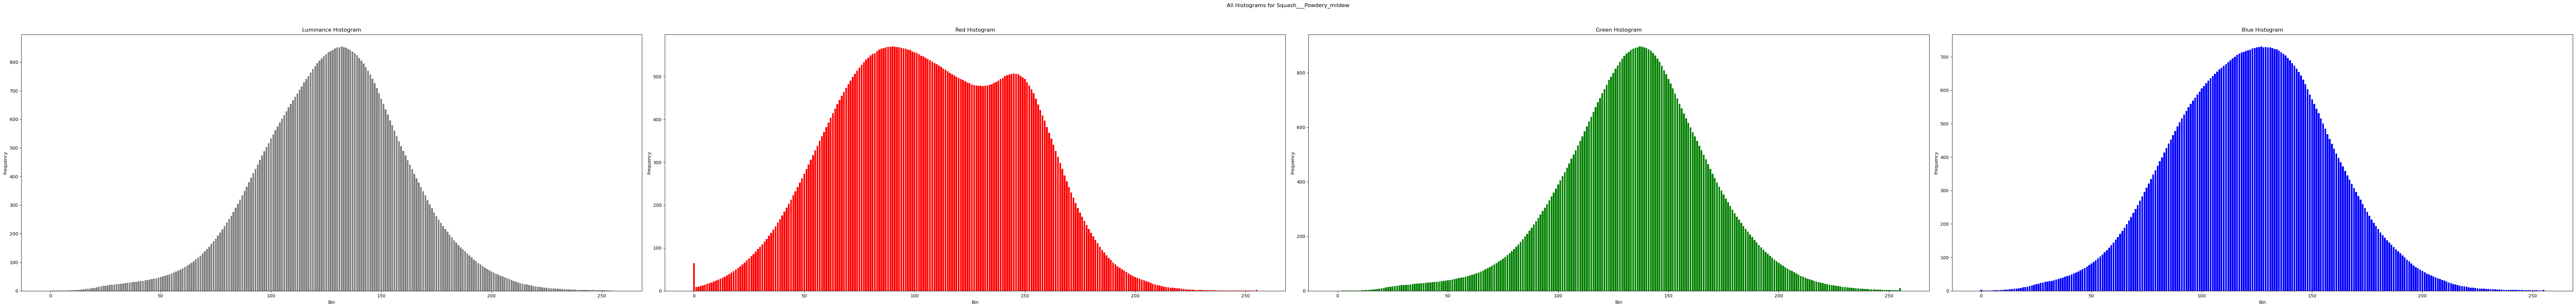

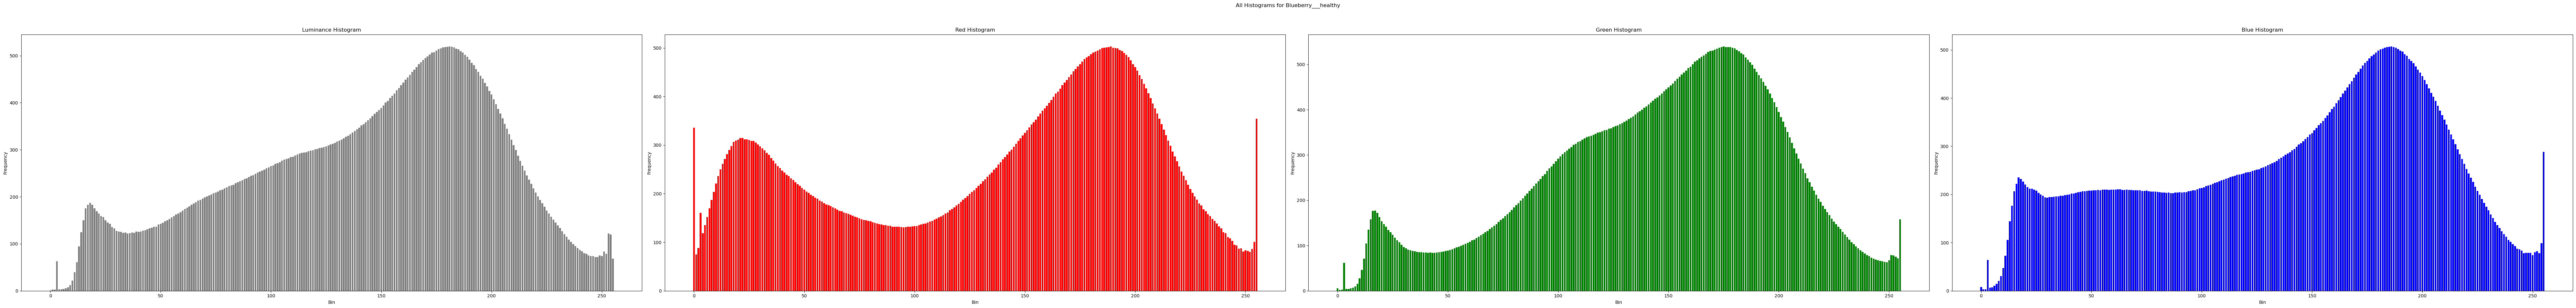

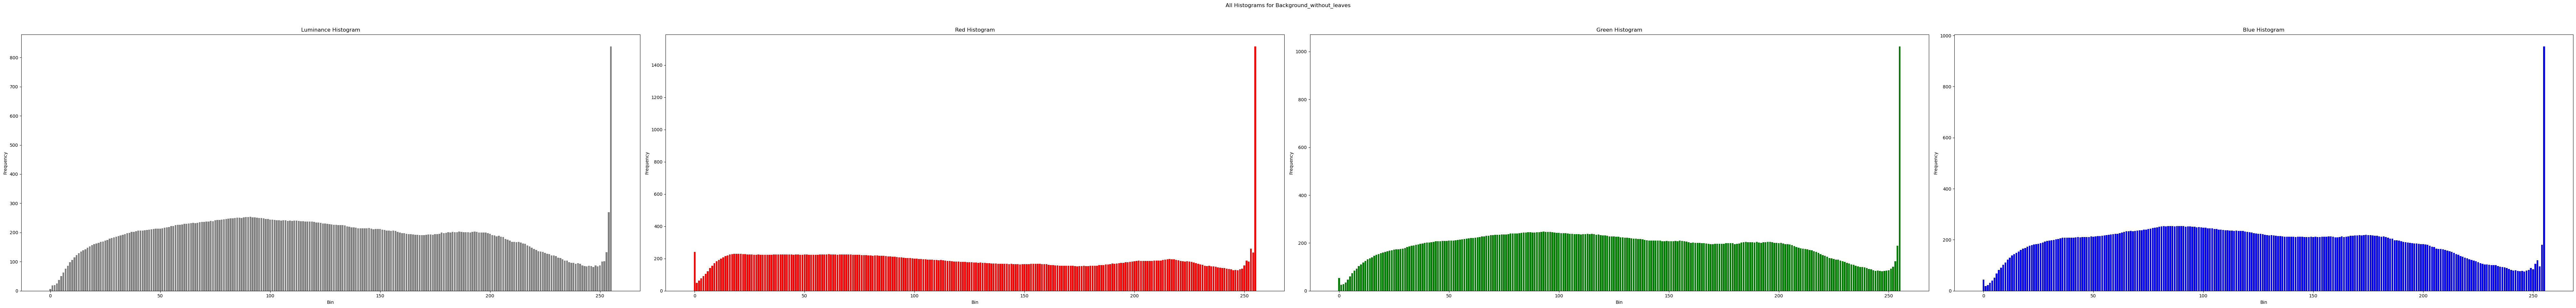

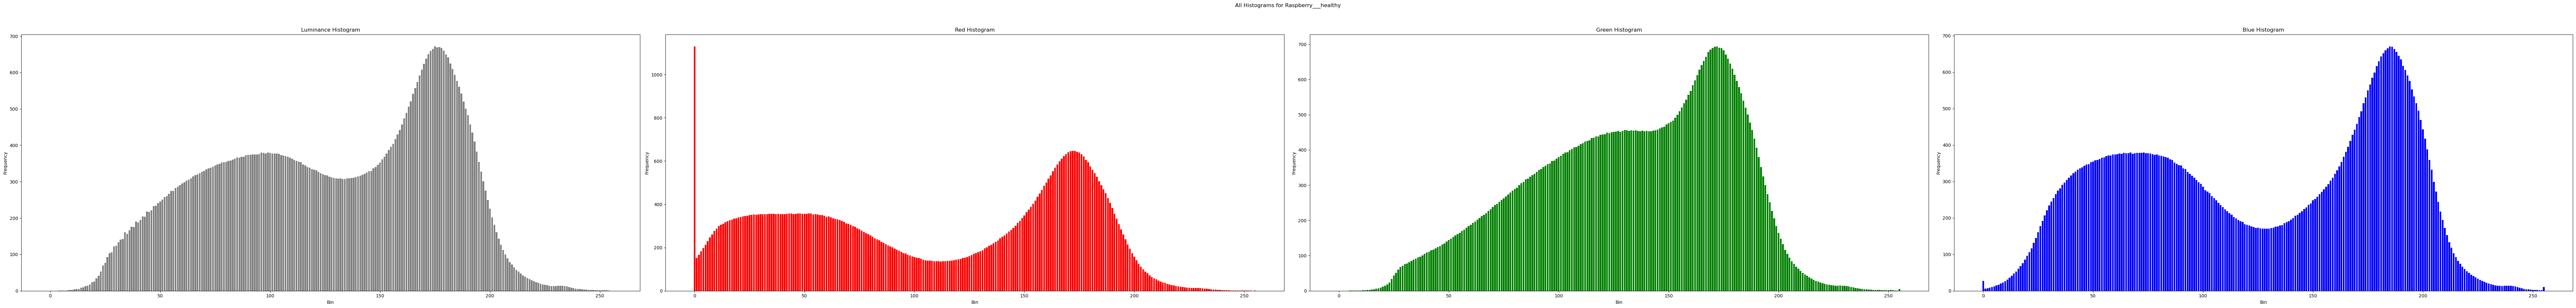

In [6]:
def load_histograms_from_file(file_path):
    data = np.load(file_path, allow_pickle=True)
    return data

def compute_mean_histograms(data_dir):
    # Navigate through each class directory
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            histograms = {'luminance': [], 'red': [], 'blue': [], 'green': []}
            
            # Load all histograms for this class
            for file_name in os.listdir(class_dir):
                file_path = os.path.join(class_dir, file_name)
                hist_data = load_histograms_from_file(file_path)
                
                for key in histograms:
                    histograms[key].append(hist_data[key])
                
            
            # Compute mean histograms
            mean_histograms = {key: np.mean(histograms[key], axis=0) for key in histograms}
            
            # Plot and save the histograms
            plot_and_save_histograms(mean_histograms, class_name, output_dir=OUTPUT_PATH)

def plot_and_save_histograms(mean_histograms, class_name, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Define a color map for histogram types
    color_map = {
        'luminance': 'gray',  # 'gray' is a valid color
        'red': 'red',
        'green': 'green',
        'blue': 'blue'
    }

    # Start a new figure with subplots
    plt.figure(figsize=(80, 10))  # Adjust size as needed
    plot_titles = ['Luminance Histogram', 'Red Histogram', 'Green Histogram', 'Blue Histogram']
    keys = ['luminance', 'red', 'green', 'blue']

    for i, key in enumerate(keys):
        ax = plt.subplot(1, 4, i + 1)
        ax.bar(range(len(mean_histograms[key])), mean_histograms[key], color=color_map[key])
        ax.set_title(plot_titles[i])
        ax.set_xlabel('Bin')
        ax.set_ylabel('Frequency')

    plt.suptitle(f'All Histograms for {class_name}')  # Main title for the figure
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title
    plt.savefig(os.path.join(output_dir, f'{class_name}.png'))


compute_mean_histograms(HIST_DATASET_PATH)